<a href="https://colab.research.google.com/github/Dcastor21/Anomaly-dection/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

new_columms= ['Data', 'VIX', 'BDIY', 'DXY', 'USGG30YR']

df = pd.read_excel("FinancialMarketData.xlsx", sheet_name="EWS", usecols=new_columms)
df

,Data,BDIY,DXY,VIX,USGG30YR
0,2000-01-11,1388,100.560,22.50,6.6710
1,2000-01-18,1405,101.860,21.50,6.7470
2,2000-01-25,1368,102.410,23.02,6.6340
3,2000-02-01,1311,104.920,23.45,6.4230
4,2000-02-08,1277,104.220,21.25,6.2310
...,...,...,...,...,...
1106,2021-03-23,2271,92.336,20.30,2.3264
1107,2021-03-30,2103,93.297,19.61,2.3687
1108,2021-04-06,2092,92.335,18.12,2.3230
1109,2021-04-13,2140,91.852,16.65,2.2939


from matplotlib import pyplot as plt
df['BDIY'].plot(kind='hist', bins=20, title='BDIY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['DXY'].plot(kind='hist', bins=20, title='DXY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['VIX'].plot(kind='hist', bins=20, title='VIX')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['USGG30YR'].plot(kind='hist', bins=20, title='USGG30YR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='BDIY', y='DXY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='DXY', y='VIX', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='VIX', y='USGG30YR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Data']
  ys = series['BDIY']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Data', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data')
_ = plt.ylabel('BDIY')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Data']
  ys = series['DXY']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Data', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data')
_ = plt.ylabel('DXY')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Data']
  ys = series['VIX']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Data', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data')
_ = plt.ylabel('VIX')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Data']
  ys = series['USGG30YR']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Data', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data')
_ = plt.ylabel('USGG30YR')

from matplotlib import pyplot as plt
df['BDIY'].plot(kind='line', figsize=(8, 4), title='BDIY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['DXY'].plot(kind='line', figsize=(8, 4), title='DXY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['VIX'].plot(kind='line', figsize=(8, 4), title='VIX')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['USGG30YR'].plot(kind='line', figsize=(8, 4), title='USGG30YR')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Data']
  ys = series['USGG30YR']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Data', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data')
_ = plt.ylabel('USGG30YR')

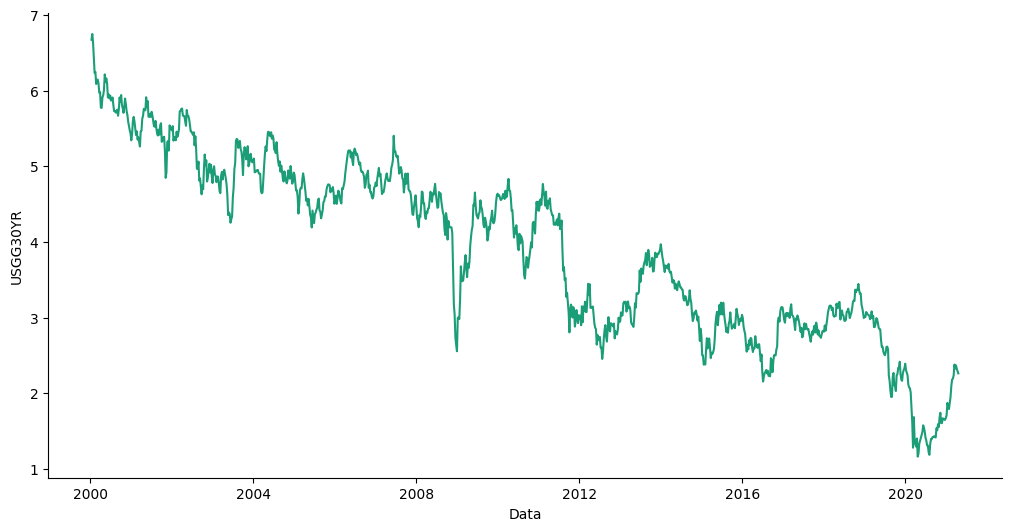

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Data']
  ys = series['USGG30YR']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Data', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Data')
_ = plt.ylabel('USGG30YR')

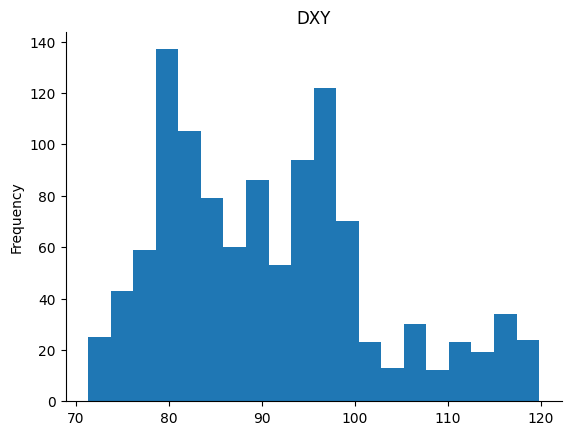

In [20]:
from matplotlib import pyplot as plt
df['DXY'].plot(kind='hist', bins=20, title='DXY')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
